# Лабораторная Работа №1
## Вариант 19

$
Y = \sqrt[3]x;
m_x = 1;
\sigma = \sqrt3;
y_0 = 0
$

## Параметры равномерного распределения
<img src="./find-a-b.png" height="500">

In [43]:
from random import random
import numpy as np
from matplotlib import pyplot as plt
from tabulate import tabulate
from math import floor

max_n = 10
a = -2
b = 4

## Получение вариационного ряда

In [57]:
def transform_x_to_y_func(value):
    is_negative = value < 0
    result = pow(abs(value), 1 / 3)
    return -result if is_negative else result

def get_eps():
    return random()

def get_x_sample(a, b, n):
    result = []
    for i in range(n):
        x = get_eps() * (b - a) + a
        result.append(x)
    return result

def get_y_sample(x_sample):
    result = []
    for x in x_sample:
        result.append(transform_x_to_y_func(x))
    return sorted(result)

x_sample = get_x_sample(a, b, max_n)

# Вариационный ряд y_sample
y_sample = get_y_sample(x_sample)

## Построение функции эмпирического распределения


|   Index |     Value |
|---------+-----------|
|       0 | -1.19807  |
|       1 | -1.18537  |
|       2 | -0.275631 |
|       3 |  0.681011 |
|       4 |  0.804357 |
|       5 |  0.87649  |
|       6 |  1.26237  |
|       7 |  1.28308  |
|       8 |  1.55043  |
|       9 |  1.58228  |



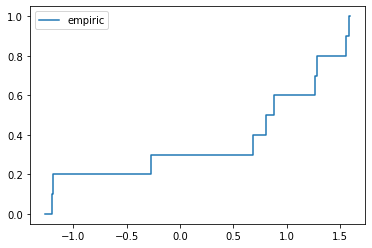

In [58]:
def render_table_view_y_sample(y_sample):
    print("\n" + tabulate([[index, y_sample[index]] for index in range(len(y_sample))], 
                    headers=['Index', 'Value'], 
                    tablefmt='orgtbl') + "\n")

def add_empiric_function_to_plot(y_sample):
    all = len(y_sample)
    y_axis = [0] + [cur / all for cur in range(all)] + [1]
    x_axis = [transform_x_to_y_func(a)] + [y for y in y_sample] + [transform_x_to_y_func(b)]
    plt.step(x_axis, y_axis, label="empiric")
    plt.legend()
    plt.show()

render_table_view_y_sample(y_sample)

add_empiric_function_to_plot(y_sample) 
plt.show()

## Построение аналитической функции распределения

<img src="./analytical.jpg" height="500">

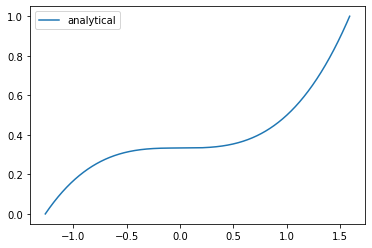

In [93]:
borderA = transform_x_to_y_func(a)
borderB = transform_x_to_y_func(b)

def analytical_func(y):    
    if y >= borderA and y <= borderB:
        return (1 / 6) * (y ** 3 - a)

    return 0 if y < x else 1

def add_analytical_function_to_plot(count):
    x_axis = np.linspace(borderA, borderB, count)
    y_axis = [analytical_func(x) for x in x_axis]
    plt.plot(x_axis, y_axis, label="analytical")
    plt.legend()

add_analytical_function_to_plot(1000)
plt.show()

## Сравнение эмпирической и аналитической функции распределения 

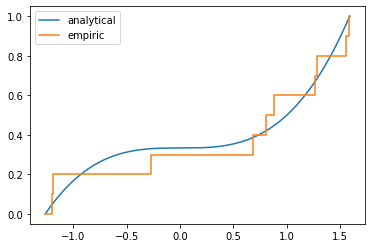

In [92]:
add_analytical_function_to_plot(1000)
add_empiric_function_to_plot(y_sample)
plt.show()